In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("anomaly_features.csv", header = None)

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.481547,0.001433,0.203289,1.788233,0.048995,1.181685,1.0,0.0,1.0,2.0,2.0,2.0,347.0,347.0,345.0
1,0.045802,0.004306,0.033439,0.116926,0.003204,0.077266,0.0,0.0,0.0,0.0,0.0,0.0,20.0,17.0,20.0
2,0.026298,0.000897,0.029053,0.030809,0.000844,0.020359,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,9.0
3,0.045802,0.001858,0.041040,0.076163,0.002087,0.050329,0.0,0.0,0.0,0.0,0.0,0.0,20.0,17.0,20.0
4,0.026298,0.004422,0.000976,0.121588,0.003331,0.080347,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,13.0


In [3]:
print("Number of rows in dataset:", len(data))

Number of rows in dataset: 4039


<Figure size 2000x2000 with 0 Axes>

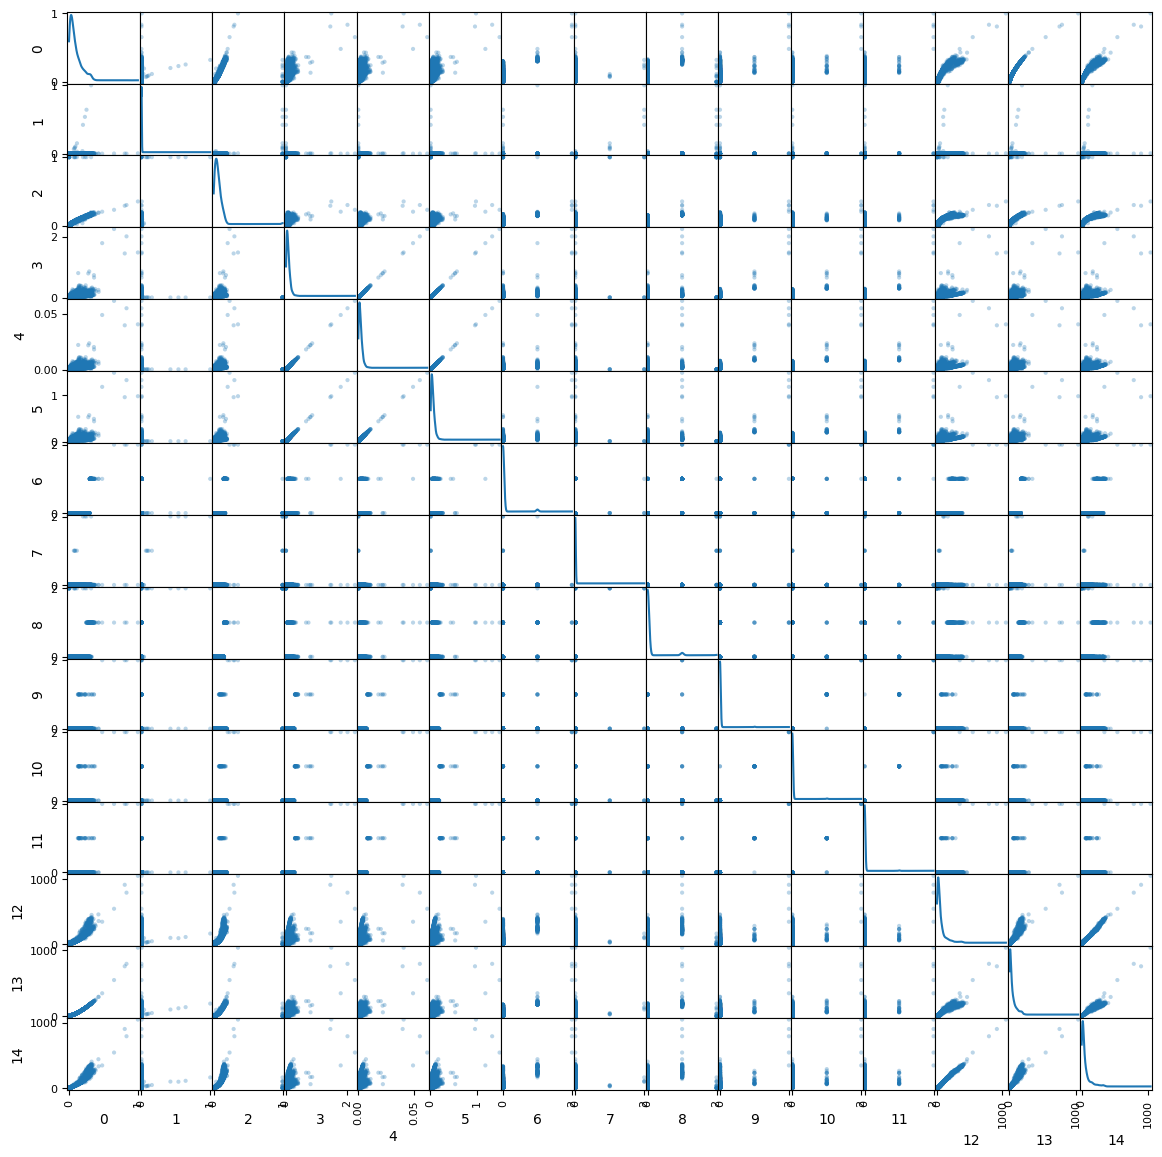

In [4]:
plt.figure(figsize = (20, 20))

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14, 14), diagonal = 'kde');

<Axes: >

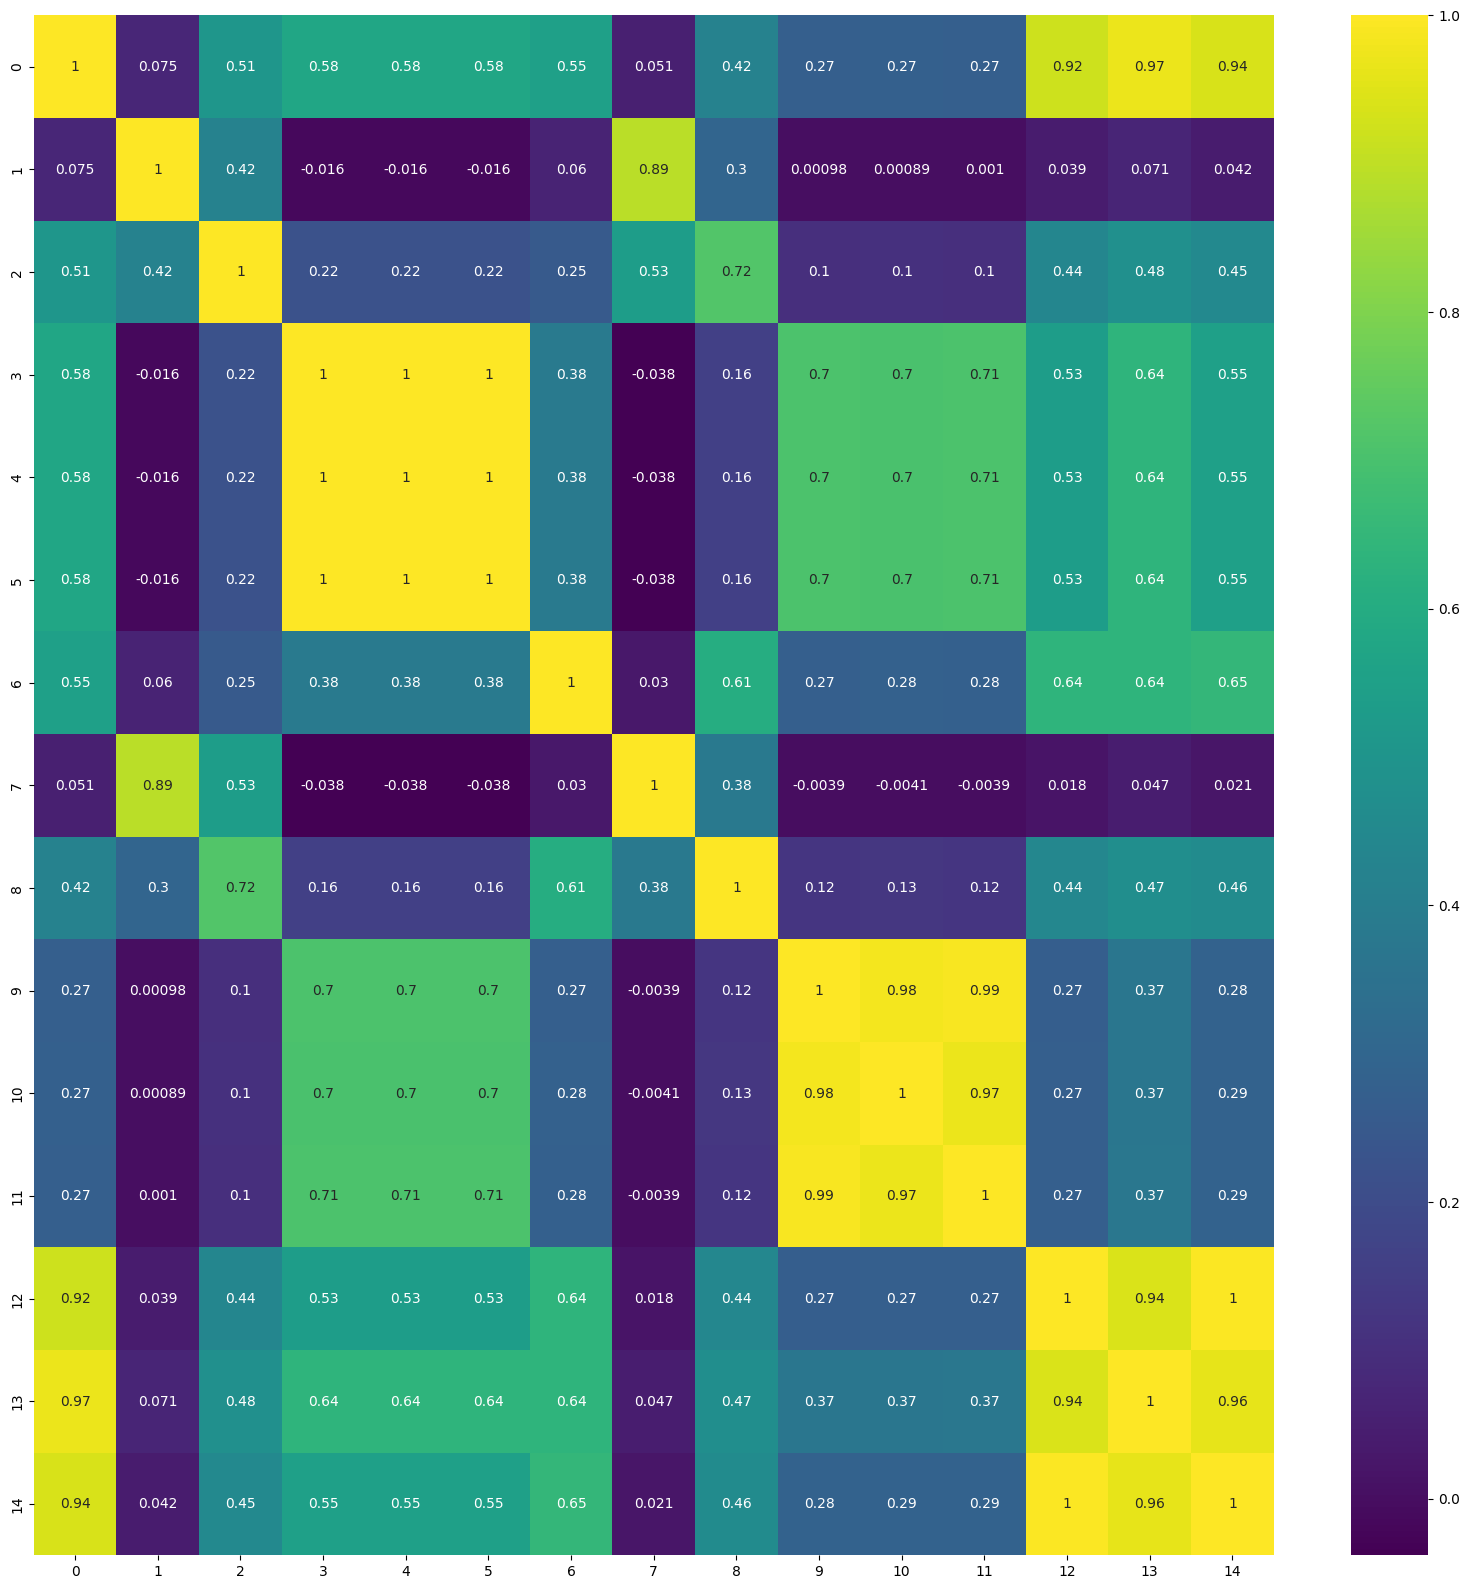

In [5]:
plt.figure(figsize = (20, 20))

sns.heatmap(data.corr(), cmap = plt.cm.viridis, annot = True)

In [6]:
from sklearn.mixture import GaussianMixture

clusterer = GaussianMixture(2)
clusterer.fit(data)

GaussianMixture(n_components=2)

In [8]:
preds_1 = clusterer.predict(data)
print(preds_1)

[1 0 0 ... 0 0 0]


In [10]:
centers = clusterer.means_
print(centers)

[[7.72138788e-02 2.45724464e-03 5.76327077e-02 7.88650618e-02
  2.16078518e-03 5.21149594e-02 0.00000000e+00 1.32948063e-03
  8.50867603e-03 2.65896126e-04 2.65896126e-04 0.00000000e+00
  4.11368080e+01 3.41387773e+01 3.78319707e+01]
 [2.88064759e-01 1.26459823e-02 1.59185116e-01 1.80731075e-01
  4.95176198e-03 1.19429216e-01 4.56616289e-01 2.87632308e-02
  5.39310578e-01 1.36625346e-01 1.43816154e-01 1.36625346e-01
  2.59649032e+02 1.70212151e+02 2.41884335e+02]]


In [12]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, preds_1)
print(score)

0.7455707738658173


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(data)
reduced_data_pca = pca.transform(data)
import matplotlib.pyplot as plt

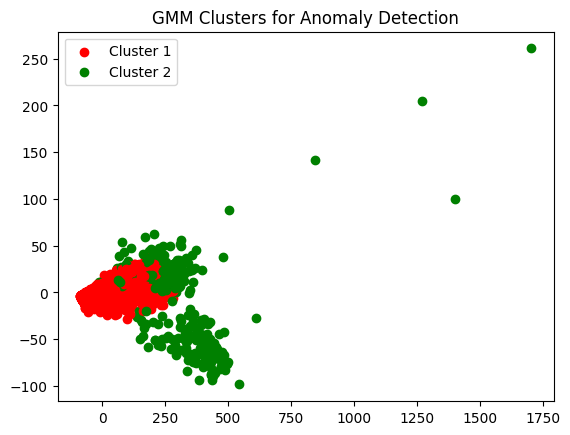

In [14]:
for i in range(0, reduced_data_pca.shape[0]):
    if preds_1[i] == 0:
        c1 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'r')
    elif preds_1[i] == 1:
        c2 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'g')

plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [21]:
for i in range(2, 10):
    test_clusterer = GaussianMixture(i)
    test_clusterer.fit(data)
    test_preds = test_clusterer.predict(data)
    score = silhouette_score(data, test_preds)
    print('Silhoutte score for', i, 'centroids:', score)

Silhoutte score for 2 centroids: 0.7455707738658173
Silhoutte score for 3 centroids: 0.6276521192178198
Silhoutte score for 4 centroids: 0.6333895035990876
Silhoutte score for 5 centroids: 0.43353939507465056
Silhoutte score for 6 centroids: 0.5928916356574966
Silhoutte score for 7 centroids: 0.43706598780010425
Silhoutte score for 8 centroids: 0.3209197127410193
Silhoutte score for 9 centroids: 0.43580790829741023


In [22]:
clusterer = GaussianMixture(3)
clusterer.fit(data)

GaussianMixture(n_components=3)

In [23]:
preds_2 = clusterer.predict(data)
print(preds_2)

[1 0 0 ... 0 0 0]


In [24]:
centers = clusterer.means_
print(centers)

[[5.36845864e-02 2.36935975e-03 4.67559372e-02 6.92397565e-02
  1.89706617e-03 4.57544447e-02 0.00000000e+00 1.63097488e-03
  1.04382392e-02 3.26194975e-04 3.26194975e-04 0.00000000e+00
  2.58499048e+01 2.17050708e+01 2.29595966e+01]
 [3.25438842e-01 2.85491798e-03 1.63988146e-01 2.00413769e-01
  5.49103845e-03 1.32435772e-01 7.56615507e-01 0.00000000e+00
  8.52693666e-01 1.02084296e-01 1.14094066e-01 1.02084296e-01
  2.81158039e+02 2.00917492e+02 2.68121305e+02]
 [1.88069136e-01 6.22144322e-03 1.12016687e-01 1.25466015e-01
  3.43758179e-03 8.29094161e-02 1.23943725e-03 9.91549804e-03
  9.91549804e-03 2.60279240e-02 2.60279240e-02 2.60279240e-02
  1.25007977e+02 9.38673143e+01 1.17152049e+02]]


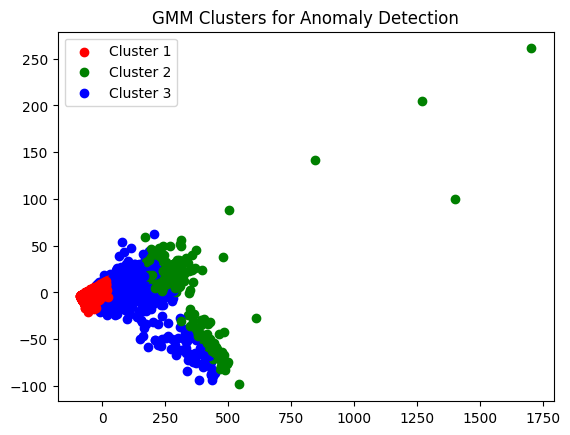

In [25]:
import matplotlib.pyplot as plt

for i in range(0, reduced_data_pca.shape[0]):
    if preds_2[i] == 0:
        c1 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'r')
    elif preds_2[i] == 1:
        c2 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'g')
    else:
        c3 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'b')

plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [26]:
data.columns = [str(i) for i in range(0, 15)]
selected_features = ['0', '1', '2', '3']

In [27]:
reduced_data = data[selected_features]
clusterer = GaussianMixture(2)
clusterer.fit(reduced_data)

GaussianMixture(n_components=2)

In [28]:
preds_3 = clusterer.predict(reduced_data)
print(preds_3)

[1 0 0 ... 0 0 0]


In [29]:
centers = clusterer.means_
print(centers)

[[0.08973252 0.00236891 0.05925295 0.08229156]
 [0.2328331  0.05886383 0.44350102 0.3389067 ]]


In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_data, preds_3)
print(score)


0.8202675459609864


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(reduced_data)
reduced_data_2 = pca.transform(reduced_data)

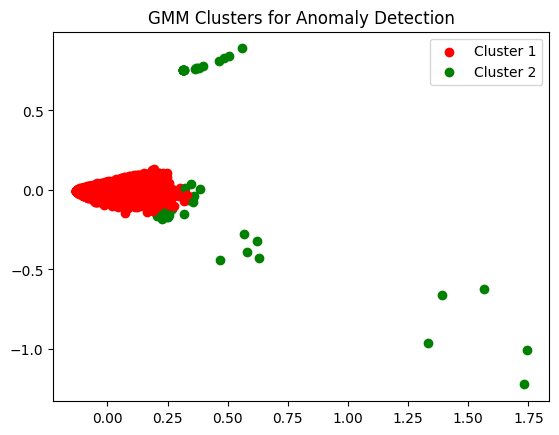

In [32]:
import matplotlib.pyplot as plt

for i in range(0, reduced_data_2.shape[0]):
    if preds_3[i] == 0:
        c1 = plt.scatter(reduced_data_2[i, 0], reduced_data_2[i, 1], c = 'r')
    elif preds_3[i] == 1:
        c2 = plt.scatter(reduced_data_2[i, 0], reduced_data_2[i, 1], c = 'g')

plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [33]:
for i in range(2, 10):
    test_clusterer = GaussianMixture(i)
    test_clusterer.fit(reduced_data)
    test_preds = test_clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, test_preds)
    print('Silhoutte score for', i, 'centroids:', score)

Silhoutte score for 2 centroids: 0.8202675459609864
Silhoutte score for 3 centroids: 0.5360977997710097
Silhoutte score for 4 centroids: 0.44536853375920465
Silhoutte score for 5 centroids: 0.4075992650403704
Silhoutte score for 6 centroids: 0.36631290919491294
Silhoutte score for 7 centroids: 0.34164570171794506
Silhoutte score for 8 centroids: 0.33975497924456544
Silhoutte score for 9 centroids: 0.2750211883595913


In [34]:
X = data
y = preds_1

In [35]:
from __future__ import division

def getNaivePredictorMetrics(y):
    FP = np.sum(y)
    TP = len(y) - FP

    TN = 0
    FN = 0

    accuracy = TP / (TP + FP)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)

    fscore = (precision * recall) / (precision + recall)

    print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

    return [accuracy, fscore]

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from time import time

def trainPredict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}

    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()

    results['train_time'] = end - start

    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()

    results['pred_time'] = end - start

    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = f1_score(y_train[:300], predictions_train)
    results['f_test'] = f1_score(y_test, predictions_test)

    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    return results

In [37]:
import matplotlib.patches as mpatches

def evaluate(results, accuracy, f1, data_label):

    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    bar_width = 0.16
    colors = ['#A00000', '#00A0A0', '#00A000', '#A0A000', '#0000A0']

    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i + k * bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    ax[0, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches)

    plt.suptitle("Performance Metrics for Classification on " + data_label + " Dataset", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [38]:
from IPython.display import display

def displayResultsTable(results):
    results_list = []
    for k, learner in enumerate(results.keys()):
        entry = [learner]
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            entry.append(results[learner][2][metric])
        results_list.append(entry)

    result_df = pd.DataFrame(data = results_list)
    result_df.columns = ['Model', 'Train Time', 'Training Accuracy', 'Training F-Score', 'Prediction Time',\
                         'Test Accuracy', 'Test F-Score']
    display(result_df)

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


def getClassificationResults(X_train, y_train, X_test, y_test):
    clf_A = GaussianNB()
    clf_B = RandomForestClassifier()
    clf_C = AdaBoostClassifier()
    clf_D = SVC()
    clf_E = MLPClassifier()

    samples_100 = len(y_train)
    samples_10 = int(0.1 * samples_100)
    samples_1 = int(0.01 * samples_100)

    results = {}
    for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = trainPredict(clf, samples, X_train, y_train, X_test, y_test)

    return results

Naive Predictor: [Accuracy score: 0.9314, F-score: 0.4822]
GaussianNB trained on 30 samples.
GaussianNB trained on 302 samples.
GaussianNB trained on 3029 samples.
RandomForestClassifier trained on 30 samples.
RandomForestClassifier trained on 302 samples.
RandomForestClassifier trained on 3029 samples.
AdaBoostClassifier trained on 30 samples.
AdaBoostClassifier trained on 302 samples.
AdaBoostClassifier trained on 3029 samples.
SVC trained on 30 samples.
SVC trained on 302 samples.
SVC trained on 3029 samples.
MLPClassifier trained on 30 samples.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier trained on 302 samples.
MLPClassifier trained on 3029 samples.


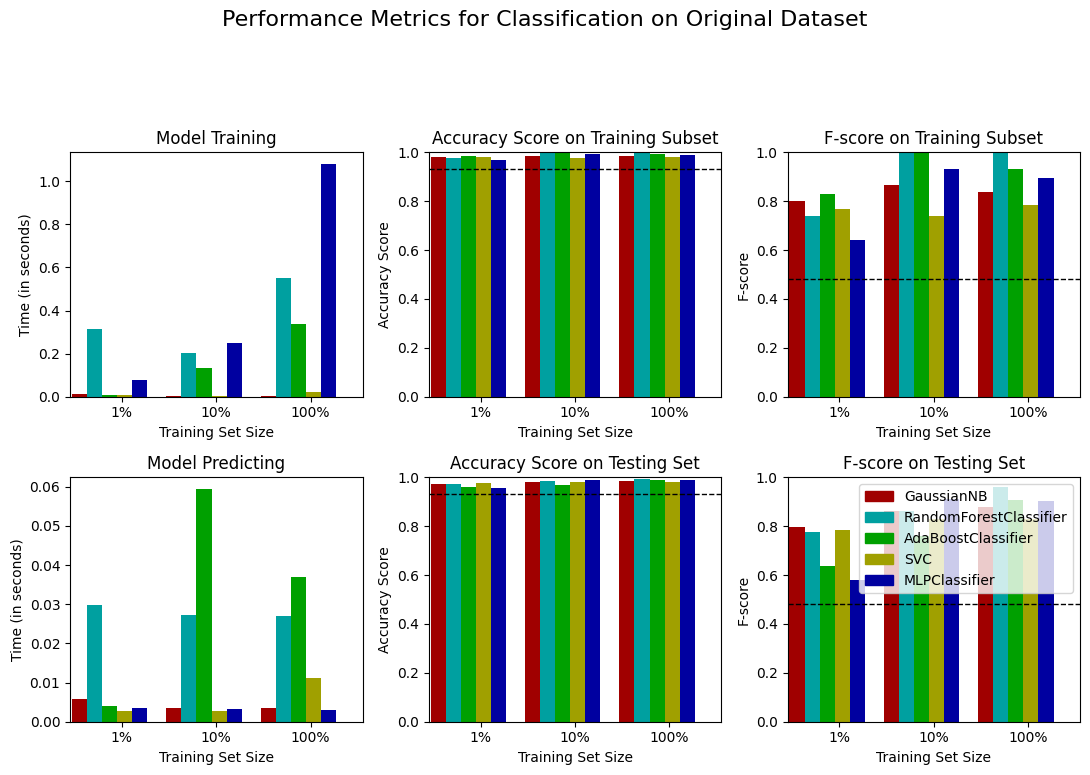

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

accuracy, fscore = getNaivePredictorMetrics(y)

results = getClassificationResults(X_train, y_train, X_test, y_test)

evaluate(results, accuracy, fscore, "Original")

In [44]:
displayResultsTable(results)

,Model,Train Time,Training Accuracy,Training F-Score,Prediction Time,Test Accuracy,Test F-Score
0,GaussianNB,0.004230,0.983333,0.838710,0.003494,0.984158,0.876923
1,RandomForestClassifier,0.552166,1.000000,1.000000,0.027089,0.995050,0.962406
2,AdaBoostClassifier,0.338022,0.993333,0.933333,0.037091,0.988119,0.909091
3,SVC,0.020395,0.980000,0.785714,0.011123,0.979208,0.829268
4,MLPClassifier,1.079855,0.990000,0.896552,0.003101,0.988119,0.903226


In [46]:
print('Potential Anomalies:\n')

anomalies = []

for i in range(0, len(y)):
    if y[i] == 1:
        anomalies.append(i)

print(anomalies)

Potential Anomalies:

[0, 25, 26, 56, 107, 119, 277, 315, 348, 349, 350, 351, 352, 359, 362, 366, 371, 403, 411, 420, 432, 564, 571, 572, 603, 612, 639, 670, 685, 697, 757, 813, 816, 820, 831, 838, 853, 862, 863, 876, 877, 885, 917, 935, 1045, 1063, 1070, 1075, 1096, 1098, 1099, 1107, 1108, 1149, 1192, 1199, 1215, 1221, 1231, 1253, 1268, 1285, 1289, 1312, 1318, 1320, 1324, 1373, 1420, 1424, 1426, 1442, 1443, 1462, 1466, 1490, 1573, 1821, 1827, 1831, 1843, 2053, 2055, 2126, 2130, 2133, 2145, 2154, 2167, 2188, 2224, 2326, 2944, 2945, 2954, 2962, 2964, 2966, 2970, 2976, 2980, 2984, 2989, 2993, 2994, 2995, 2996, 2999, 3002, 3007, 3018, 3024, 3025, 3029, 3030, 3032, 3034, 3035, 3041, 3043, 3044, 3045, 3047, 3048, 3051, 3053, 3054, 3058, 3062, 3063, 3065, 3066, 3068, 3071, 3073, 3076, 3079, 3080, 3084, 3085, 3087, 3090, 3091, 3094, 3095, 3096, 3097, 3101, 3103, 3104, 3106, 3110, 3112, 3120, 3125, 3130, 3133, 3135, 3136, 3141, 3142, 3146, 3150, 3152, 3155, 3157, 3159, 3165, 3169, 3175, 3178, 